Link to Medium blog post: https://medium.com/@haya.toumy/encoding-string-variables-in-python-and-dealing-with-null-values-93f8e48fe5c1

# Encoding String Variables in Python, and Dealing With Null Values

## Straight-forward way, with dictionaries:

Make a dictionary which keys are the columns you want to change to numbers; and values are what you want to change to. These values are in their turn a dictionary of the the strings you want to encode (as keys), and the integer value you chose to assign to it. Say I have three columns,

In [1]:
quality = ['excellent', 'good', 'acceptable', 'poor']
sizes = ['huge','good','small']
shades = ['blue','grey']
nums = {
    'quality' : {'excellent' : 3, 'good' : 2, 'acceptable' : 1, 'poor' : 0},
    'sizes' : {'huge' : 3 , 'good' : 2, 'small' : 1},
    'shades' : {'grey' : 2 , 'blue': 5}
}

Then replace these columns in your dataframe:

In [ ]:
df.replace(nums, inplace = True)

Without the argument inplace = True, changes are not saved to the df, but showed for your inspection.

You can also use a dictionary with .map on a pandas series:

In [ ]:
classes_numerical = df['classes'].map({'sick': 1, 'healthy':0})

## Using .astype('category').cat.codes

Suppose I have a column called quality having these values:

In [5]:
quality = ['excellent','good','acceptable','poor']

I want to change them into numbers to reflect quality.

Also beware, that you need quality to be a pandas dataframe, because .cat.codes work on pandas Series. To change a list to dataframe, do



In [6]:
import pandas as pd
pd.DataFrame(quality, columns=['quality'])

,quality
0,excellent
1,good
2,acceptable
3,poor


Then,

In [ ]:
quality['quality'].astype('category').cat.codes

Beware! using .cat.codes codes your columns alphabetically starting from zero! You’ll have this as a result:

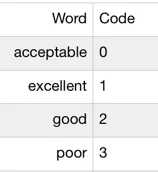

That might not be what you want, but it will give you a quick way to change a string Series to numbers to include it in your model. Like when you have two ordinal values and you want a quick convert.

For sake of completenes, here’s an example with encoding several columns at once:

In [ ]:
ordinals = ['exter_qual', 'exter_cond', 'bsmt_cond', 'heating_qc', 'kitchen_qual', 'fireplace_qu', 'garage_qual', 'garage_cond','pool_qc']

In [ ]:
new_df = pd.DataFrame(df[ordinals])


Now I encode them, using a dictionary comprehension, and changing it at once to a dataframe; and saving my changes:

In [ ]:
df[ordinals] = 
pd.DataFrame({col: new_df[col].astype('category').cat.codes for col in new_df}, index = df.index)

The index argument at the end is to take the row numbers (the indices) from the original dataframe, or whatever dataframe that matches row numbers. If you want to rename the columns in your new dataframe made by the dictionary, use the argument columns= and make sure you feed it a list; (even if your case is one element, in the case you have one column only).
Don’t forget to save it over your original dataframe subset, so it would replace the categorical columns with the new encoded ones.

## Dummies, a.k.a. one hot encoding:

This can simply be done like so:

In [ ]:
cols_to_encode = ['rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane']
dummies = pd.get_dummies(X[cols_to_encode], prefix=cols_to_encode)

X is the name of my dataframe. cols_to_encode has the column names I want to encode.

This is also very handy tool to get rid of NaNs, by setting the argument dummy_na = True in pd.get_dummies:

In [ ]:
# create dummies AND drop NaNs
cols_to_encode = ['rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane']
dummies = pd.get_dummies(X[cols_to_encode], prefix=cols_to_encode, dummy_na=True)
#Removing the nan columns
nan_col_list = [s for s in dummies.columns if 'nan' in s] 
# columns has nan in their name
dummies.drop(columns = nan_col_list, axis = 1, inplace = True)

axis = 1 to drop from the columns, vs. axis = 0 to drop rows.
inplace = True to save your changes.
prefix adds a prefix and underscore to each dummy column so you know which dummies belong to which variable.

I used a list comprehension in nan_col_list to find all columns containing ‘nan’ in their names.

Then I can filter these rows (using .loc) and drop them from a certain column if I wish to do so later on.

In [ ]:
df.loc[pd.isnull(df['col_name']), :]